In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [76]:
df = pd.read_csv('D:/finance-vix.txt',
                sep=',',
                infer_datetime_format=True,
                index_col=False)

#convert'Date' into 'to_datetime'
df['Date'] = pd.to_datetime(df['Date'])

#To change the name of MEDV column to PRICE 
df = df.rename(columns={'VIX Close':'Close'})
df = df.rename(columns={'VIX Open':'Open'})

print(df.head())
print(df.describe())

        Date   Open  VIX High  VIX Low  Close
0 2004-01-02  17.96     18.68    17.54  18.22
1 2004-01-05  18.45     18.49    17.44  17.49
2 2004-01-06  17.66     17.67    16.19  16.73
3 2004-01-07  16.72     16.75    15.50  15.50
4 2004-01-08  15.42     15.68    15.32  15.61
              Open     VIX High      VIX Low        Close
count  3725.000000  3725.000000  3725.000000  3725.000000
mean     18.457289    19.301055    17.611780    18.357952
std       8.879643     9.465319     8.269978     8.844818
min       9.010000     9.310000     8.560000     9.140000
25%      13.010000    13.470000    12.540000    12.910000
50%      15.720000    16.440000    15.070000    15.600000
75%      20.900000    21.910000    19.890000    20.790000
max      80.740000    89.530000    72.760000    80.860000


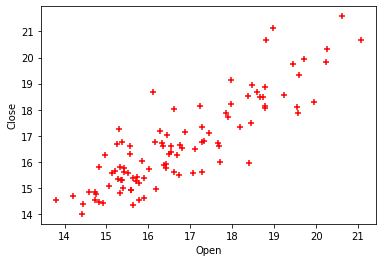

In [38]:
plt.xlabel('Open')
plt.ylabel('Close')
plt.scatter(df.Open[:100], df.Close[:100], color='red', marker='+')
plt.show()

# Set Linear Regression

## Univariate linear regression

In [50]:
# X independent (Open)
# Y dependent - we are predictiong Y
X = df[['Open']]
Y = df['Close']

#Now split our data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

print('X_train shape {}'.format(X_train.shape))
print('Y_train shape {}'.format(Y_train.shape))
print('X_test shape {}'.format(X_test.shape))
print('Y_test shape {}'.format(Y_test.shape))

X_train shape (2980, 1)
Y_train shape (2980,)
X_test shape (745, 1)
Y_test shape (745,)


In [40]:
#Scale data, otherwise model will fail
scaler = StandardScaler()
scaler = scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
#Create an instance of the model
reg = linear_model.LinearRegression()
#Training model (fit a line)
reg.fit(X_train_scaled, Y_train)
#Prediction model
y_pred_reg = reg.predict(X_test_scaled)

In [42]:
mse_reg = mean_squared_error(Y_test, y_pred_reg)
mae_reg = mean_absolute_error(Y_test, y_pred_reg)

print('Mean Squared Error from linear regression: ', mse_reg)
print('Mean Absolute Error from linear regression: ', mae_reg)

Mean Squared Error from linear regression:  1.6063304087040298
Mean Absolute Error from linear regression:  0.8046095214655167


## Multivariate linear regression

In [73]:
#Drop 'Date' column
df = df.drop('Date', axis=1)

# X independent 
# Y dependent - we are predictiong Y (Close)
X = df.drop('Close', axis=1)
Y = df['Close']

#Now split our data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

print('X_train shape {}'.format(X_train.shape))
print('Y_train shape {}'.format(Y_train.shape))
print('X_test shape {}'.format(X_test.shape))
print('Y_test shape {}'.format(Y_test.shape))

X_train shape (2980, 3)
Y_train shape (2980,)
X_test shape (745, 3)
Y_test shape (745,)


In [74]:
#Scale data, otherwise model will fail
scaler = StandardScaler()
scaler = scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
#Set linear regression
model_lr = linear_model.LinearRegression()
model_lr.fit(X_train_scaled, Y_train)
y_pred = model_lr.predict(X_test_scaled)
mse_lr = mean_squared_error(Y_test, y_pred)
mae_lr = mean_absolute_error(Y_test, y_pred)

print('Mean Squared Error from linear regression: {}'.format(mse_lr))
print('Mean Absolute Error from linear regression: {}'.format(mae_lr))

Mean Squared Error from linear regression: 0.4629834612478618
Mean Absolute Error from linear regression: 0.4000079387387294


## Regression_statsmodel

## Univariate linear regression

In [60]:
# X independent (Date)
# Y dependent - we are predictiong Y
X = df[['Open']]
Y = df['Close']

#Add constant value to independent variable
X_ = sm.add_constant(X)
#Fit the model
model = sm.OLS(Y, X_)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 1.337e+05
Date:                Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:58:47   Log-Likelihood:                -6684.3
No. Observations:                3725   AIC:                         1.337e+04
Df Residuals:                    3723   BIC:                         1.339e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2238      0.055      4.067      0.0

In [61]:
display("rsquared is : {}".format(results.rsquared))
display("params is : {}".format(results.params))
display("fittedvalues is : {}".format(results.fittedvalues))

'rsquared is : 0.9729042601256039'

'params is : const    0.223836\nOpen     0.982491\ndtype: float64'

'fittedvalues is : 0       17.869370\n1       18.350791\n2       17.574623\n3       16.651082\n4       15.373844\n          ...    \n3720    22.889898\n3721    21.475111\n3722    21.809158\n3723    20.148749\n3724    16.985129\nLength: 3725, dtype: float64'

## Multivariate linear regression

In [77]:
#Drop 'Date' column
df = df.drop('Date', axis=1)

# X independent 
# Y dependent - we are predictiong Y (Close)
X = df[['Open', 'VIX High', 'VIX Low']]
Y = df['Close']

#Add constant to independent variables
x = sm.add_constant(X)

#Fit the model
model = sm.OLS(Y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.900e+05
Date:                Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:13:07   Log-Likelihood:                -4021.7
No. Observations:                3725   AIC:                             8051.
Df Residuals:                    3721   BIC:                             8076.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0594      0.028     -2.115      0.0

In [78]:
display("rsquared is : {}".format(results.rsquared))
display("params is : {}".format(results.params))
display("fittedvalues is : {}".format(results.fittedvalues))

'rsquared is : 0.9935131586068717'

'params is : const      -0.059351\nOpen       -0.485745\nVIX High    0.687020\nVIX Low     0.801885\ndtype: float64'

'fittedvalues is : 0       18.115271\n1       17.666533\n2       16.484559\n3       15.755800\n4       15.507817\n          ...    \n3720    25.107103\n3721    24.589488\n3722    20.607426\n3723    18.287959\n3724    18.765244\nLength: 3725, dtype: float64'